### 5 April Assignment Solution

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
df= pd.read_csv('diabetes.csv')


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df["BMI"]=df["BMI"].replace(0,df["BMI"].mean())
df["Insulin"]=df["Insulin"].replace(0,df["Insulin"].mean())
df["SkinThickness"]=df["SkinThickness"].replace(0,df["SkinThickness"].mean())
df["BloodPressure"]=df["BloodPressure"].replace(0,df["BloodPressure"].mean())
df["Glucose"]=df["Glucose"].replace(0,df["Glucose"].mean())


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


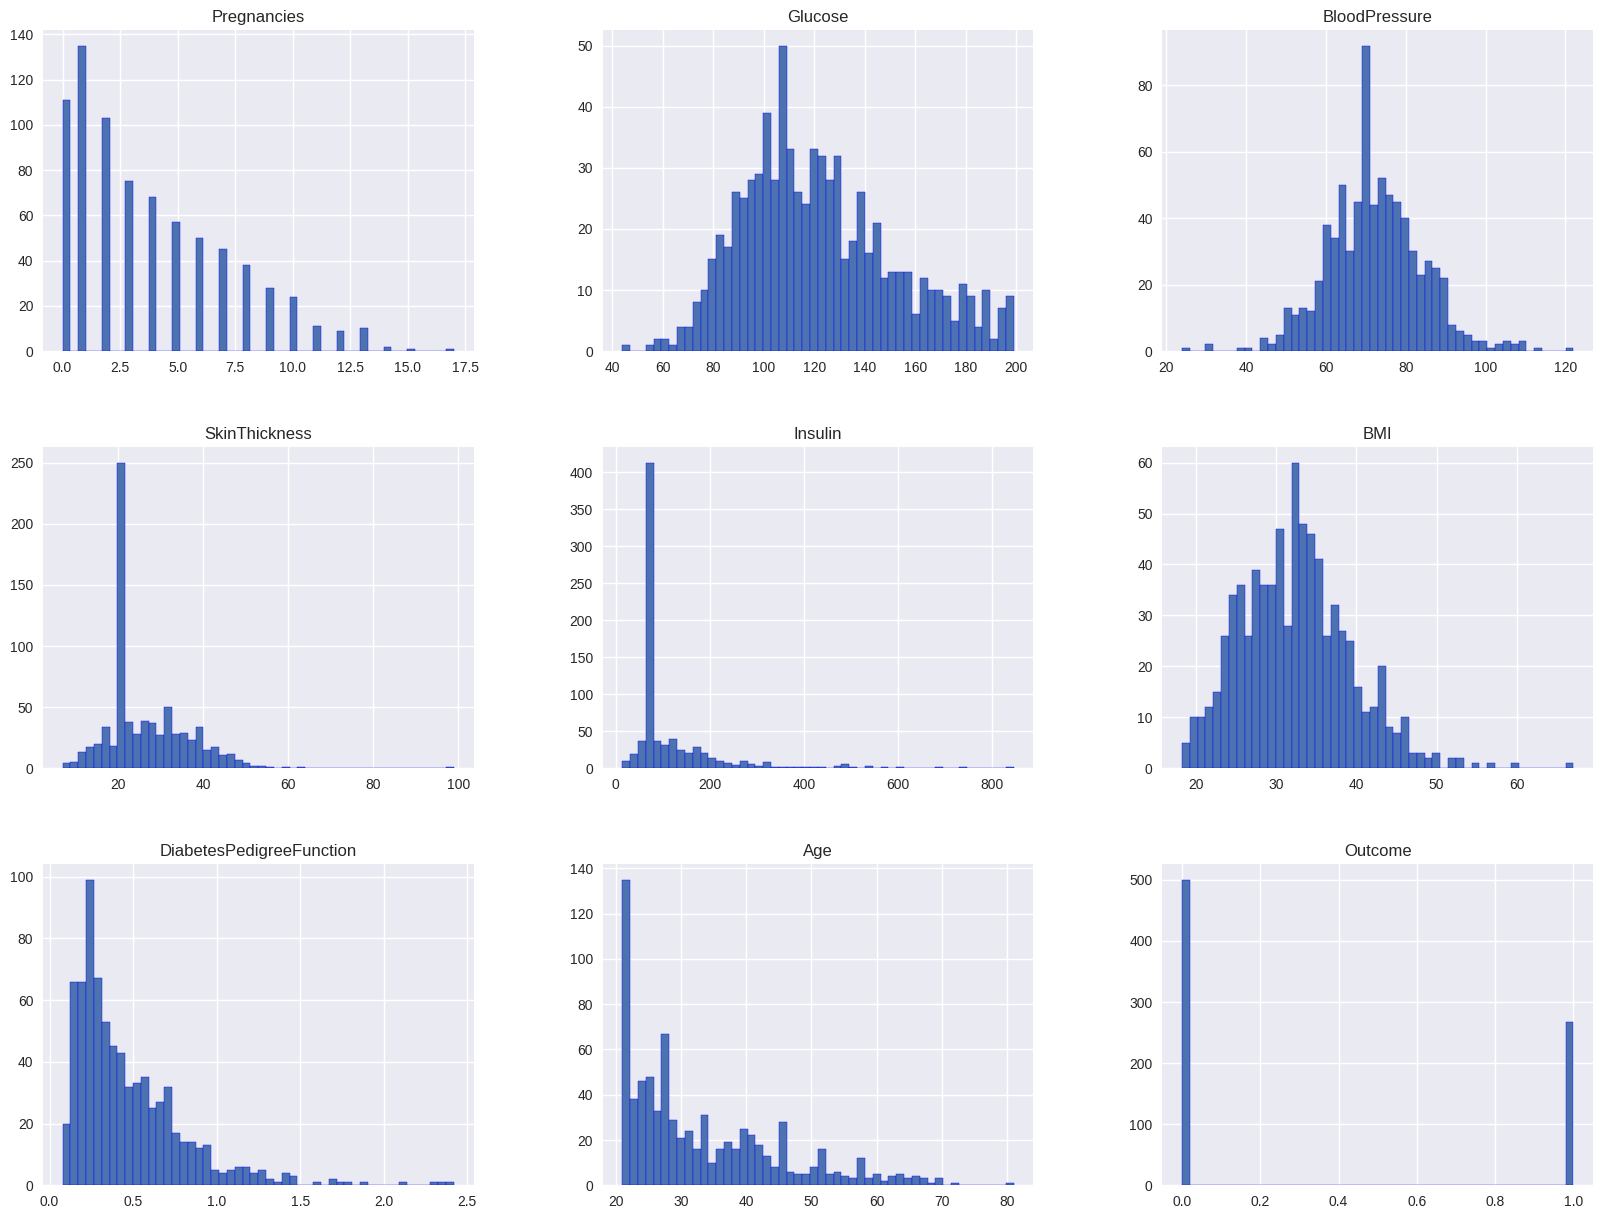

In [10]:
# PLot density plot for all features
plt.style.use('seaborn')
df.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

<AxesSubplot: >

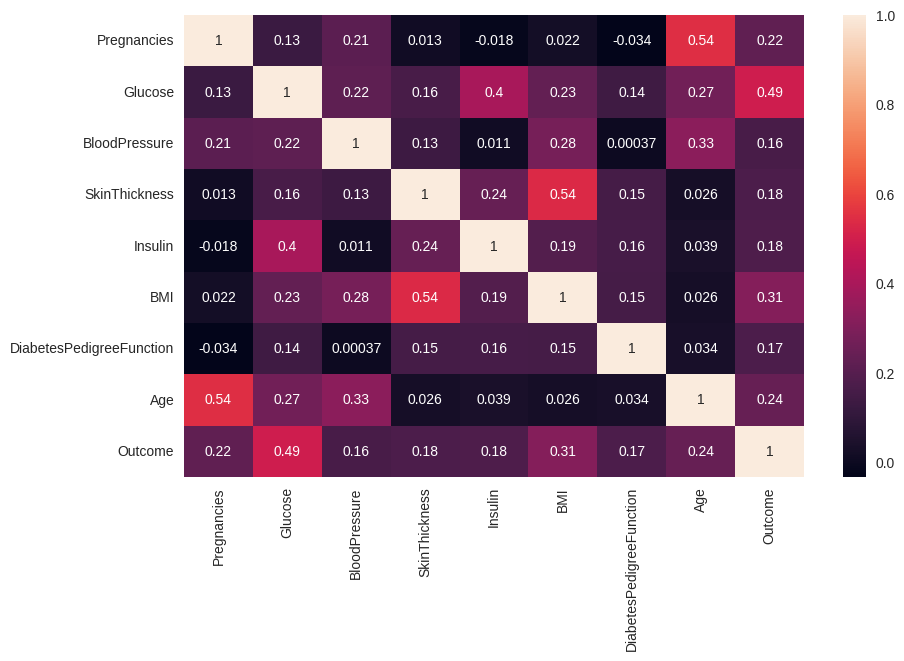

In [11]:
#to Visulize
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot: >

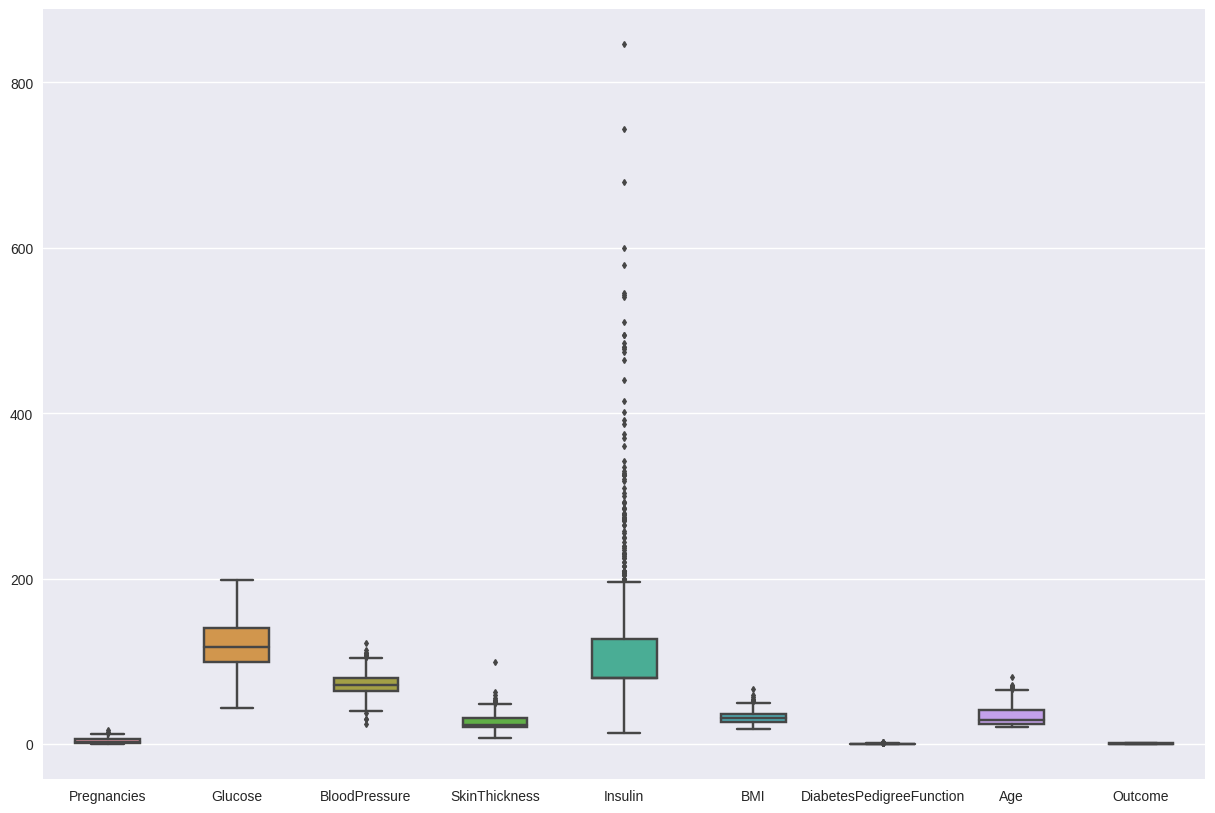

In [12]:
fig, ax= plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width=0.5,ax=ax, fliersize=3) 

In [13]:
X=df.drop(columns=['Outcome'])
y=df['Outcome']

In [14]:
X.shape,y.shape

((768, 8), (768,))

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape,X_test.shape

((576, 8), (192, 8))

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
import warnings 
warnings.filterwarnings('ignore')

In [25]:
parameters ={
    'criterion' : ['gini','entropy','log_loss'],
    'splitter' :['best', 'random'],
    'max_depth' : [1,2,3,4,5],
    'max_features' : ['auto','sqrt', 'log2']    
    
}

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
treeclassifier_Pre = DecisionTreeClassifier()

clf = GridSearchCV(treeclassifier_Pre,param_grid=parameters , cv=5, scoring='accuracy')

In [28]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [29]:
### Pre Pruning parameters

clf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [30]:
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [35]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve, auc

score_new=accuracy_score(y_pred,y_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print(score_new)
print(classification_report(y_pred,y_test))
print(conf_matrix)

0.7083333333333334
              precision    recall  f1-score   support

           0       0.89      0.73      0.81       158
           1       0.32      0.59      0.42        34

    accuracy                           0.71       192
   macro avg       0.61      0.66      0.61       192
weighted avg       0.79      0.71      0.74       192

[[116  14]
 [ 42  20]]


In [39]:

# ROC Curve
best_dt = clf.best_estimator_
y_prob = best_dt.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


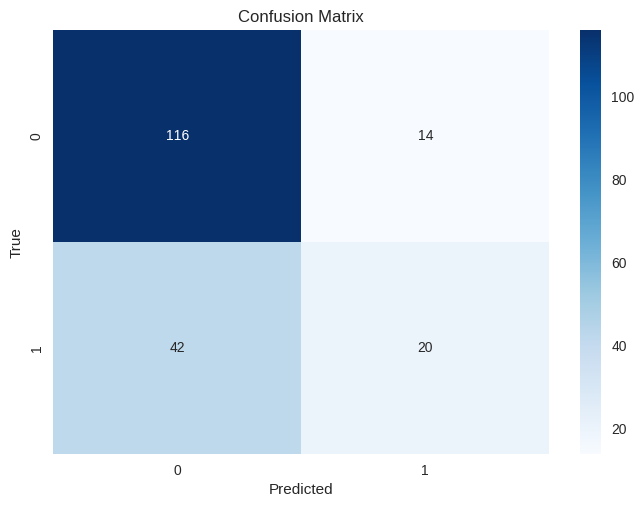

In [40]:

# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


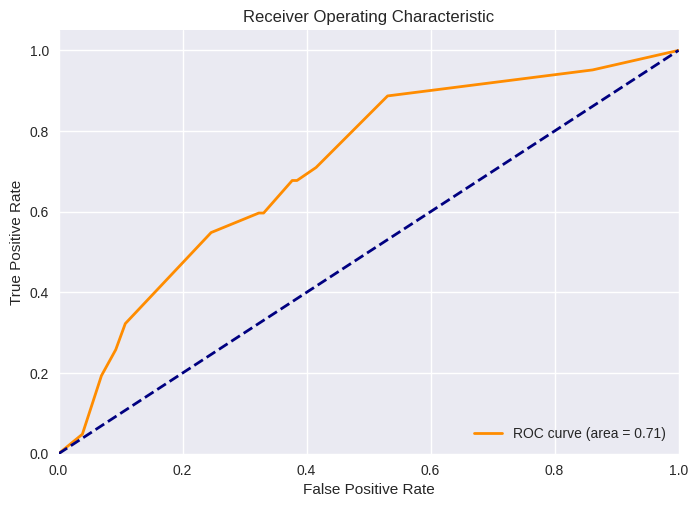

In [41]:

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

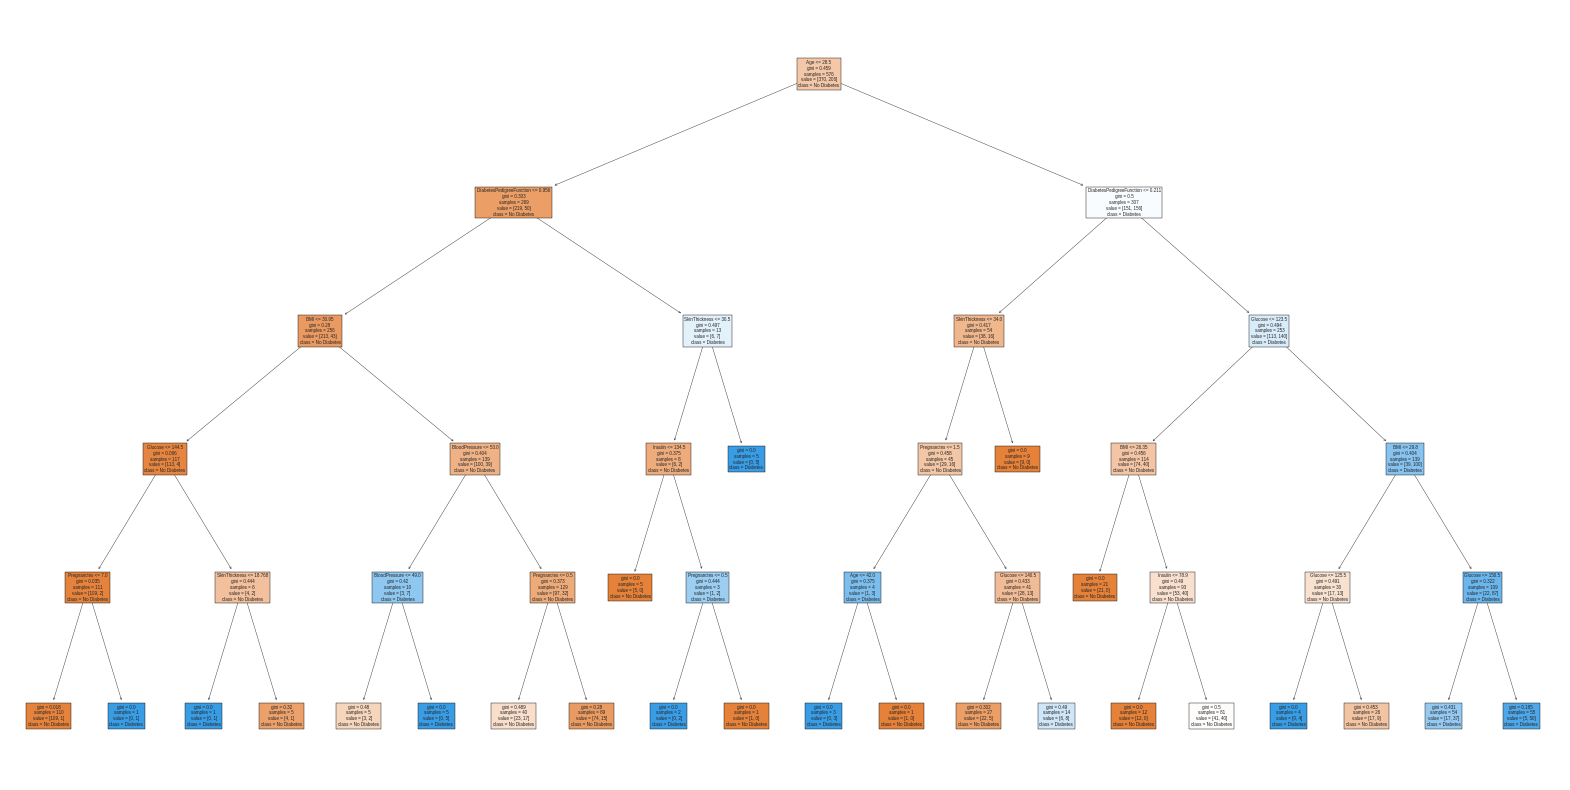

Age                         0.273144
Glucose                     0.232211
BMI                         0.177382
DiabetesPedigreeFunction    0.081014
Pregnancies                 0.072264
Insulin                     0.059065
SkinThickness               0.056099
BloodPressure               0.048821
dtype: float64


In [42]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(best_dt, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.show()

# Feature importance
feature_importances = pd.Series(best_dt.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)


In [43]:
import numpy as np

# Function to perform sensitivity analysis
def sensitivity_analysis(model, X_test, y_test, feature_name, values):
    results = []
    for value in values:
        X_test_copy = X_test.copy()
        X_test_copy[feature_name] = value
        y_pred = model.predict(X_test_copy)
        accuracy = accuracy_score(y_test, y_pred)
        results.append((value, accuracy))
    return results

# Example: Sensitivity analysis for 'Glucose' feature
glucose_values = np.linspace(X['Glucose'].min(), X['Glucose'].max(), 10)
sensitivity_results = sensitivity_analysis(best_dt, X_test, y_test, 'Glucose', glucose_values)

# Print sensitivity analysis results
for value, accuracy in sensitivity_results:
    print(f'Glucose: {value}, Accuracy: {accuracy}')

# Scenario testing
# Example: Scenario where Glucose levels are uniformly high
X_test_high_glucose = X_test.copy()
X_test_high_glucose['Glucose'] = X_test_high_glucose['Glucose'].max()
y_pred_high_glucose = best_dt.predict(X_test_high_glucose)
accuracy_high_glucose = accuracy_score(y_test, y_pred_high_glucose)
print(f'Accuracy with high glucose scenario: {accuracy_high_glucose}')


Glucose: 44.0, Accuracy: 0.6666666666666666
Glucose: 61.22222222222222, Accuracy: 0.6666666666666666
Glucose: 78.44444444444444, Accuracy: 0.6666666666666666
Glucose: 95.66666666666666, Accuracy: 0.6666666666666666
Glucose: 112.88888888888889, Accuracy: 0.6666666666666666
Glucose: 130.11111111111111, Accuracy: 0.6822916666666666
Glucose: 147.33333333333331, Accuracy: 0.5989583333333334
Glucose: 164.55555555555554, Accuracy: 0.5989583333333334
Glucose: 181.77777777777777, Accuracy: 0.5989583333333334
Glucose: 199.0, Accuracy: 0.5989583333333334
Accuracy with high glucose scenario: 0.5989583333333334


### Interpreting Results

**Tree Structure:** By visualizing the decision tree, you can see the sequence of splits and understand the decision rules the model uses.
Feature Importance: Features with higher importance scores are more influential in predicting diabetes. Commonly, features like Glucose, BMI, and Age are critical.

**Sensitivity Analysis:** By varying key features (e.g., Glucose), you can see how sensitive the model's predictions are to changes in these features. Significant changes in accuracy indicate that the model relies heavily on these features.

**Scenario Testing:** Applying the model to extreme scenarios (e.g., uniformly high glucose levels) helps understand how robust the model is to unusual but possible situations.